# VIX Variational Inference

## Plan

### Data and features

<b>Input</b>
* Daily VIX
___
<b>Technical indicators</b>
* Moving average
* High minus low
* Momentum
* Exponential moving average
* Bollinger band (upper and lower)
___
**Exogenous data**
* EPU
* Interest rates (?)
* Inflation
* Unemployment (?)
* S&P500
___

### Preprocessing
**Normalization**
* Normalize within windows
___
**Outliers etc.**
___
**In general**<br>
Compare methods used in project papers which utilized neural networks
___

### Training and validation
**Validation windows**
* Walk forward window with sliding window 
___
**Window size**
* Check what has been done in previous papers, particularly wrt how predictions are done for multiple steps ahead. E.g. when the model has been trained to do 1-day ahead predictions, how do you predict multiple days ahead?
___
**Splitting**
* Train/validation/test or split train into validation folds, then use validation set for testing, then test on test set?

### Network architecture
**Number of layers (*Depth*)**<br>
___
**Number of neurons *(Wide)***<br>
___
**Activation functions**
___

## Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read VIX data

In [4]:
vix = pd.read_csv("data/VIX_History.csv")

Convert into datetime and numeric

In [9]:
vix["DATE"] = pd.to_datetime(vix.DATE)

In [16]:
for col in vix.columns:
    if col != "DATE":
        vix[col] = pd.to_numeric(vix[col], downcast="float")

In [19]:
import matplotlib.dates as mdates

In [20]:
vix.columns

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE'], dtype='object')

In [64]:
vix["DAILY_RETURNS"] = np.log(vix.CLOSE)- np.log(vix.CLOSE.shift(1))

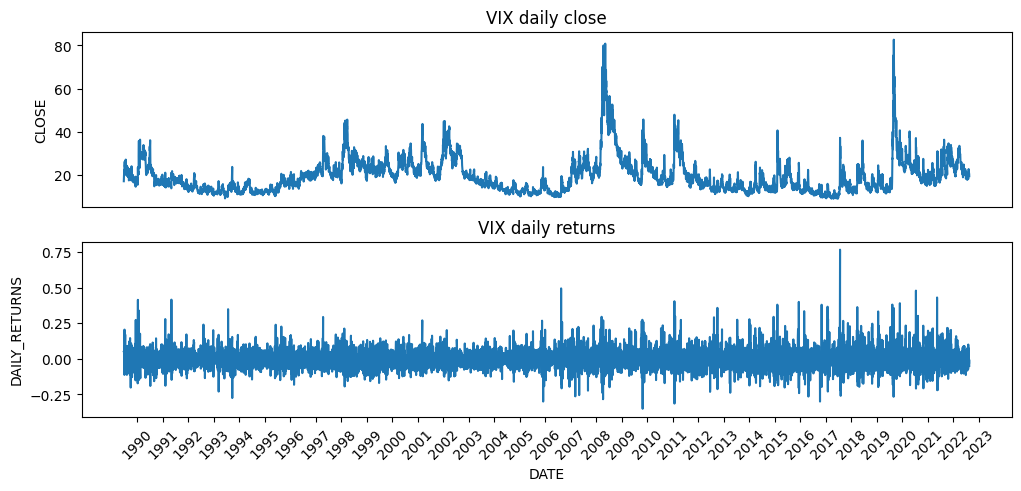

In [73]:
fig, axs = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
sns.lineplot(vix, x="DATE", y="CLOSE", ax=axs[0])
sns.lineplot(vix, x="DATE", y="DAILY_RETURNS", ax=axs[1])
axs[1].xaxis.set_major_locator(mdates.YearLocator(1, month=7, day=15))
# Remove first and last tick to prevent data outside of scope and 2024 from appearing
axs[1].set_xticks(axs[1].get_xticks()[2:-1], axs[1].get_xticklabels()[2:-1], rotation=45, ha='center')
axs[0].tick_params(bottom=False)
axs[0].set_title("VIX daily close")
axs[1].set_title("VIX daily returns");